In [6]:
n = 50

# Create n random points

random.seed(1)
points = [(random.randint(0,100),random.randint(0,100)) for i in range(n)]

# Dictionary of Euclidean distance between each pair of points

my_dist = [[math.sqrt(sum((points[i][k]-points[j][k])**2 for k in range(2)))
    for i in range(n)] for j in range(n)]



dist={(i,j) :math.sqrt(sum((points[i][k]-points[j][k])**2+ i for k in range(2)))
    for i in range(n) for j in range(i)}

cities = [[i,points[i][0], points[i][1]] for i in range(len(points))]
print("Model Data Created")


Model Data Created


In [2]:
#!/usr/bin/python

# Copyright 2019, Gurobi Optimization, LLC

# Solve a traveling salesman problem on a randomly generated set of
# points using lazy constraints.   The base MIP model only includes
# 'degree-2' constraints, requiring each node to have exactly
# two incident edges.  Solutions to this model may contain subtours -
# tours that don't visit every city.  The lazy constraint callback
# adds new constraints to cut them off.

import sys
import math
import random
import itertools
from gurobipy import *

# Callback - use lazy constraints to eliminate sub-tours

def subtourelim(model, where):
    if where == GRB.Callback.MIPSOL:
        # make a list of edges selected in the solution
        vals = model.cbGetSolution(model._vars)
        selected = tuplelist((i,j) for i,j in model._vars.keys() if vals[i,j] > 0.5)
        # find the shortest cycle in the selected edge list
        tour = subtour(selected)
        if len(tour) < n:
            # add subtour elimination constraint for every pair of cities in tour
            model.cbLazy(quicksum(model._vars[i,j]
                                  for i,j in itertools.combinations(tour, 2))
                         <= len(tour)-1)


# Given a tuplelist of edges, find the shortest subtour

def subtour(edges):
    unvisited = list(range(n))
    cycle = range(n+1) # initial length has 1 more city
    while unvisited: # true if list is non-empty
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i,j in edges.select(current,'*') if j in unvisited]
        if len(cycle) > len(thiscycle):
            cycle = thiscycle
    return cycle

## Simulated Annealing

Simulated Annealing starts with parameters:
Initial Temperature:  311.49672198353966
Cooling Rate:  0.99
Initial Epoch Length:  100
Stopping Criterion: No Improvement for 100 epochs

Epoch  1
Temperature:  311.49672198353966
Epoch Length:  100
Current Dist:  21560.798713244145
Best Dist:  21286.8160937372
Epoch  2
Temperature:  308.38175476370424
Epoch Length:  100
Current Dist:  20904.77223731709
Best Dist:  20774.648987513592
Epoch  3
Temperature:  305.29793721606717
Epoch Length:  100
Current Dist:  21307.87795673142
Best Dist:  20774.648987513592
Epoch  4
Temperature:  302.2449578439065
Epoch Length:  100
Current Dist:  20931.41636260917
Best Dist:  20774.648987513592
Epoch  5
Temperature:  299.2225082654674
Epoch Length:  100
Current Dist:  21078.16217127775
Best Dist:  20774.648987513592
Epoch  6
Temperature:  296.23028318281274
Epoch Length:  100
Current Dist:  20890.203306780815
Best Dist:  20543.061574464806
Epoch  7
Temperature:  293.2679803509846
Epoch Length:  100
Current D

Epoch  65
Temperature:  163.7215829502749
Epoch Length:  100
Current Dist:  20477.699272342546
Best Dist:  19819.598414629156
Epoch  66
Temperature:  162.08436712077213
Epoch Length:  100
Current Dist:  20350.864457868593
Best Dist:  19819.598414629156
Epoch  67
Temperature:  160.4635234495644
Epoch Length:  100
Current Dist:  20264.443276923208
Best Dist:  19819.598414629156
Epoch  68
Temperature:  158.85888821506876
Epoch Length:  100
Current Dist:  20328.5393693417
Best Dist:  19819.598414629156
Epoch  69
Temperature:  157.27029933291806
Epoch Length:  100
Current Dist:  20351.044961643987
Best Dist:  19819.598414629156
Epoch  70
Temperature:  155.69759633958887
Epoch Length:  100
Current Dist:  20573.163215858578
Best Dist:  19819.598414629156
Epoch  71
Temperature:  154.14062037619297
Epoch Length:  100
Current Dist:  20579.621198243145
Best Dist:  19819.598414629156
Epoch  72
Temperature:  152.59921417243103
Epoch Length:  100
Current Dist:  20135.765800415484
Best Dist:  19819.5

Epoch  130
Temperature:  85.19097404148148
Epoch Length:  100
Current Dist:  19590.401890194535
Best Dist:  18408.176273543395
Epoch  131
Temperature:  84.33906430106667
Epoch Length:  100
Current Dist:  19490.85890144481
Best Dist:  18408.176273543395
Epoch  132
Temperature:  83.495673658056
Epoch Length:  100
Current Dist:  19275.19822753785
Best Dist:  18408.176273543395
Epoch  133
Temperature:  82.66071692147544
Epoch Length:  100
Current Dist:  19230.531327520494
Best Dist:  18408.176273543395
Epoch  134
Temperature:  81.83410975226069
Epoch Length:  100
Current Dist:  19107.36026755712
Best Dist:  18408.176273543395
Epoch  135
Temperature:  81.01576865473808
Epoch Length:  100
Current Dist:  19119.49261405618
Best Dist:  18408.176273543395
Epoch  136
Temperature:  80.2056109681907
Epoch Length:  100
Current Dist:  18872.706629025553
Best Dist:  18408.176273543395
Epoch  137
Temperature:  79.40355485850878
Epoch Length:  100
Current Dist:  18480.456228957966
Best Dist:  18368.2575

Epoch  195
Temperature:  44.32831595783316
Epoch Length:  100
Current Dist:  17111.737279809608
Best Dist:  16888.70463999924
Epoch  196
Temperature:  43.88503279825483
Epoch Length:  100
Current Dist:  17358.932965974825
Best Dist:  16888.70463999924
Epoch  197
Temperature:  43.44618247027228
Epoch Length:  100
Current Dist:  17098.991464138137
Best Dist:  16888.70463999924
Epoch  198
Temperature:  43.011720645569554
Epoch Length:  100
Current Dist:  16760.881912616886
Best Dist:  16600.03562458266
Epoch  199
Temperature:  42.581603439113856
Epoch Length:  100
Current Dist:  16840.18600420999
Best Dist:  16600.03562458266
Epoch  200
Temperature:  42.155787404722716
Epoch Length:  100
Current Dist:  16396.608121294405
Best Dist:  16396.608121294405
Epoch  201
Temperature:  41.734229530675485
Epoch Length:  100
Current Dist:  16239.259608931327
Best Dist:  16238.86438073928
Epoch  202
Temperature:  41.31688723536873
Epoch Length:  100
Current Dist:  16353.68620829044
Best Dist:  16188.8

Epoch  261
Temperature:  22.835160902769758
Epoch Length:  100
Current Dist:  13782.536365856244
Best Dist:  13702.86040316842
Epoch  262
Temperature:  22.60680929374206
Epoch Length:  100
Current Dist:  14131.577883858501
Best Dist:  13702.86040316842
Epoch  263
Temperature:  22.38074120080464
Epoch Length:  100
Current Dist:  14181.518869464497
Best Dist:  13702.86040316842
Epoch  264
Temperature:  22.156933788796593
Epoch Length:  100
Current Dist:  14179.354041806566
Best Dist:  13702.86040316842
Epoch  265
Temperature:  21.935364450908626
Epoch Length:  100
Current Dist:  14078.533818298627
Best Dist:  13702.86040316842
Epoch  266
Temperature:  21.716010806399538
Epoch Length:  100
Current Dist:  13869.03379291728
Best Dist:  13702.86040316842
Epoch  267
Temperature:  21.49885069833554
Epoch Length:  100
Current Dist:  13644.781974899692
Best Dist:  13632.747520339637
Epoch  268
Temperature:  21.283862191352185
Epoch Length:  100
Current Dist:  13654.752196500598
Best Dist:  13531

Epoch  329
Temperature:  11.529150507990652
Epoch Length:  100
Current Dist:  9528.766517526401
Best Dist:  9461.187806934815
Epoch  330
Temperature:  11.413859002910746
Epoch Length:  100
Current Dist:  9566.289776312942
Best Dist:  9461.187806934815
Epoch  331
Temperature:  11.299720412881639
Epoch Length:  100
Current Dist:  9446.518462573384
Best Dist:  9436.088790495134
Epoch  332
Temperature:  11.186723208752822
Epoch Length:  100
Current Dist:  9383.308198446655
Best Dist:  9374.340788115669
Epoch  333
Temperature:  11.074855976665294
Epoch Length:  100
Current Dist:  9237.047448784884
Best Dist:  9210.206534989968
Epoch  334
Temperature:  10.96410741689864
Epoch Length:  100
Current Dist:  9183.677108646047
Best Dist:  9183.677108646047
Epoch  335
Temperature:  10.854466342729653
Epoch Length:  100
Current Dist:  8983.50283898174
Best Dist:  8983.50283898174
Epoch  336
Temperature:  10.745921679302356
Epoch Length:  100
Current Dist:  9091.059913882165
Best Dist:  8983.50283898

Best Dist:  6580.519350900363
Epoch  399
Temperature:  5.705069383703143
Epoch Length:  100
Current Dist:  6515.202684184941
Best Dist:  6509.008260147908
Epoch  400
Temperature:  5.648018689866111
Epoch Length:  100
Current Dist:  6492.579545720362
Best Dist:  6464.377070101804
Epoch  401
Temperature:  5.59153850296745
Epoch Length:  100
Current Dist:  6446.496518160708
Best Dist:  6446.496518160708
Epoch  402
Temperature:  5.535623117937775
Epoch Length:  100
Current Dist:  6433.242357931626
Best Dist:  6424.130065448809
Epoch  403
Temperature:  5.480266886758398
Epoch Length:  100
Current Dist:  6403.440930112977
Best Dist:  6391.37852041262
Epoch  404
Temperature:  5.425464217890814
Epoch Length:  100
Current Dist:  6399.001566732694
Best Dist:  6383.724184096773
Epoch  405
Temperature:  5.371209575711905
Epoch Length:  100
Current Dist:  6346.624387799447
Best Dist:  6343.983073317414
Epoch  406
Temperature:  5.3174974799547865
Epoch Length:  100
Current Dist:  6360.301992154661
B

Epoch  473
Temperature:  2.711847920494925
Epoch Length:  100
Current Dist:  4997.450058989844
Best Dist:  4997.450058989844
Epoch  474
Temperature:  2.6847294412899756
Epoch Length:  100
Current Dist:  4997.004856478637
Best Dist:  4994.803672948974
Epoch  475
Temperature:  2.6578821468770757
Epoch Length:  100
Current Dist:  4969.8732815681915
Best Dist:  4969.8732815681915
Epoch  476
Temperature:  2.6313033254083047
Epoch Length:  100
Current Dist:  4926.866905769262
Best Dist:  4926.866905769262
Epoch  477
Temperature:  2.6049902921542216
Epoch Length:  100
Current Dist:  4898.233118256383
Best Dist:  4898.213353418546
Epoch  478
Temperature:  2.578940389232679
Epoch Length:  100
Current Dist:  4882.453812673689
Best Dist:  4882.453812673689
Epoch  479
Temperature:  2.5531509853403525
Epoch Length:  100
Current Dist:  4866.690997089333
Best Dist:  4866.690997089333
Epoch  480
Temperature:  2.527619475486949
Epoch Length:  100
Current Dist:  4845.858878489826
Best Dist:  4845.858878

Epoch  550
Temperature:  1.25076383322934
Epoch Length:  100
Current Dist:  4168.952810013711
Best Dist:  4168.952810013711
Epoch  551
Temperature:  1.2382561948970465
Epoch Length:  100
Current Dist:  4155.279076384645
Best Dist:  4153.439167895455
Epoch  552
Temperature:  1.225873632948076
Epoch Length:  100
Current Dist:  4137.722363891929
Best Dist:  4137.722363891929
Epoch  553
Temperature:  1.2136148966185951
Epoch Length:  100
Current Dist:  4130.365431149801
Best Dist:  4130.365431149801
Epoch  554
Temperature:  1.2014787476524091
Epoch Length:  100
Current Dist:  4124.023411204861
Best Dist:  4124.023411204861
Epoch  555
Temperature:  1.189463960175885
Epoch Length:  100
Current Dist:  4101.058124621102
Best Dist:  4101.058124621102
Epoch  556
Temperature:  1.177569320574126
Epoch Length:  100
Current Dist:  4092.4407892412564
Best Dist:  4092.4407892412564
Epoch  557
Temperature:  1.1657936273683847
Epoch Length:  100
Current Dist:  4073.197658031651
Best Dist:  4073.19765803

Epoch  623
Temperature:  0.6005435687135892
Epoch Length:  100
Current Dist:  3569.5493065164387
Best Dist:  3569.5493065164387
Epoch  624
Temperature:  0.5945381330264533
Epoch Length:  100
Current Dist:  3568.8557583156644
Best Dist:  3568.8557583156644
Epoch  625
Temperature:  0.5885927516961887
Epoch Length:  100
Current Dist:  3560.7499713987395
Best Dist:  3560.7499713987395
Epoch  626
Temperature:  0.5827068241792268
Epoch Length:  100
Current Dist:  3536.164494442678
Best Dist:  3536.164494442678
Epoch  627
Temperature:  0.5768797559374346
Epoch Length:  100
Current Dist:  3536.164494442678
Best Dist:  3536.164494442678
Epoch  628
Temperature:  0.5711109583780603
Epoch Length:  100
Current Dist:  3504.489263405012
Best Dist:  3504.489263405012
Epoch  629
Temperature:  0.5653998487942796
Epoch Length:  100
Current Dist:  3504.489263405012
Best Dist:  3504.489263405012
Epoch  630
Temperature:  0.5597458503063368
Epoch Length:  100
Current Dist:  3493.2020177507566
Best Dist:  349

Epoch  714
Temperature:  0.240628591412284
Epoch Length:  100
Current Dist:  3173.380964081415
Best Dist:  3173.380964081415
Epoch  715
Temperature:  0.23822230549816115
Epoch Length:  100
Current Dist:  3173.380964081415
Best Dist:  3173.380964081415
Epoch  716
Temperature:  0.23584008244317953
Epoch Length:  100
Current Dist:  3173.380964081415
Best Dist:  3173.380964081415
Epoch  717
Temperature:  0.23348168161874772
Epoch Length:  100
Current Dist:  3173.380964081415
Best Dist:  3173.380964081415
Epoch  718
Temperature:  0.23114686480256025
Epoch Length:  100
Current Dist:  3169.9585368825474
Best Dist:  3169.9585368825474
Epoch  719
Temperature:  0.22883539615453463
Epoch Length:  100
Current Dist:  3169.332955851117
Best Dist:  3169.332955851117
Epoch  720
Temperature:  0.2265470421929893
Epoch Length:  100
Current Dist:  3166.033398633621
Best Dist:  3166.033398633621
Epoch  721
Temperature:  0.2242815717710594
Epoch Length:  100
Current Dist:  3166.033398633621
Best Dist:  3166

Best Dist:  2967.092632921279
Epoch  784
Temperature:  0.11907232963594042
Epoch Length:  100
Current Dist:  2965.8074255407355
Best Dist:  2965.8074255407355
Epoch  785
Temperature:  0.11788160633958102
Epoch Length:  100
Current Dist:  2965.8074255407355
Best Dist:  2965.8074255407355
Epoch  786
Temperature:  0.1167027902761852
Epoch Length:  100
Current Dist:  2965.8074255407355
Best Dist:  2965.8074255407355
Epoch  787
Temperature:  0.11553576237342335
Epoch Length:  100
Current Dist:  2957.7328349192635
Best Dist:  2957.7328349192635
Epoch  788
Temperature:  0.11438040474968911
Epoch Length:  100
Current Dist:  2957.7328349192635
Best Dist:  2957.7328349192635
Epoch  789
Temperature:  0.11323660070219221
Epoch Length:  100
Current Dist:  2957.7328349192635
Best Dist:  2957.7328349192635
Epoch  790
Temperature:  0.1121042346951703
Epoch Length:  100
Current Dist:  2957.156698157579
Best Dist:  2957.156698157579
Epoch  791
Temperature:  0.11098319234821859
Epoch Length:  100
Current

Epoch  858
Temperature:  0.056599846170865276
Epoch Length:  100
Current Dist:  2829.2027967187128
Best Dist:  2829.2027967187128
Epoch  859
Temperature:  0.05603384770915662
Epoch Length:  100
Current Dist:  2829.2027967187128
Best Dist:  2829.2027967187128
Epoch  860
Temperature:  0.05547350923206505
Epoch Length:  100
Current Dist:  2829.2027967187128
Best Dist:  2829.2027967187128
Epoch  861
Temperature:  0.0549187741397444
Epoch Length:  100
Current Dist:  2829.2027967187128
Best Dist:  2829.2027967187128
Epoch  862
Temperature:  0.05436958639834696
Epoch Length:  100
Current Dist:  2829.2027967187128
Best Dist:  2829.2027967187128
Epoch  863
Temperature:  0.053825890534363485
Epoch Length:  100
Current Dist:  2828.6766413670166
Best Dist:  2828.6766413670166
Epoch  864
Temperature:  0.05328763162901985
Epoch Length:  100
Current Dist:  2821.297320866999
Best Dist:  2821.297320866999
Epoch  865
Temperature:  0.052754755312729655
Epoch Length:  100
Current Dist:  2818.1141283966244

Best Dist:  2660.591620022733
Epoch  952
Temperature:  0.022005109956707524
Epoch Length:  100
Current Dist:  2660.591620022733
Best Dist:  2660.591620022733
Epoch  953
Temperature:  0.02178505885714045
Epoch Length:  100
Current Dist:  2660.591620022733
Best Dist:  2660.591620022733
Epoch  954
Temperature:  0.021567208268569043
Epoch Length:  100
Current Dist:  2645.5956862544463
Best Dist:  2645.5956862544463
Epoch  955
Temperature:  0.02135153618588335
Epoch Length:  100
Current Dist:  2643.040894631822
Best Dist:  2643.040894631822
Epoch  956
Temperature:  0.02113802082402452
Epoch Length:  100
Current Dist:  2643.040894631822
Best Dist:  2643.040894631822
Epoch  957
Temperature:  0.020926640615784274
Epoch Length:  100
Current Dist:  2643.040894631822
Best Dist:  2643.040894631822
Epoch  958
Temperature:  0.02071737420962643
Epoch Length:  100
Current Dist:  2643.040894631822
Best Dist:  2643.040894631822
Epoch  959
Temperature:  0.020510200467530167
Epoch Length:  100
Current Dis

Epoch  1042
Temperature:  0.00890617156178167
Epoch Length:  100
Current Dist:  2488.421232241201
Best Dist:  2488.421232241201
Epoch  1043
Temperature:  0.008817109846163854
Epoch Length:  100
Current Dist:  2488.421232241201
Best Dist:  2488.421232241201
Epoch  1044
Temperature:  0.008728938747702216
Epoch Length:  100
Current Dist:  2488.3858463165743
Best Dist:  2488.3858463165743
Epoch  1045
Temperature:  0.008641649360225195
Epoch Length:  100
Current Dist:  2488.3858463165743
Best Dist:  2488.3858463165743
Epoch  1046
Temperature:  0.008555232866622943
Epoch Length:  100
Current Dist:  2478.4141658135154
Best Dist:  2478.4141658135154
Epoch  1047
Temperature:  0.008469680537956714
Epoch Length:  100
Current Dist:  2478.4141658135154
Best Dist:  2478.4141658135154
Epoch  1048
Temperature:  0.008384983732577147
Epoch Length:  100
Current Dist:  2478.4141658135154
Best Dist:  2478.4141658135154
Epoch  1049
Temperature:  0.008301133895251375
Epoch Length:  100
Current Dist:  2478.41

Epoch  1117
Temperature:  0.004191125364644459
Epoch Length:  100
Current Dist:  2346.6421628340545
Best Dist:  2346.6421628340545
Epoch  1118
Temperature:  0.004149214110998015
Epoch Length:  100
Current Dist:  2346.6421628340545
Best Dist:  2346.6421628340545
Epoch  1119
Temperature:  0.004107721969888034
Epoch Length:  100
Current Dist:  2345.9496094106016
Best Dist:  2345.9496094106016
Epoch  1120
Temperature:  0.004066644750189154
Epoch Length:  100
Current Dist:  2344.5353958482287
Best Dist:  2344.5353958482287
Epoch  1121
Temperature:  0.004025978302687263
Epoch Length:  100
Current Dist:  2344.5353958482287
Best Dist:  2344.5353958482287
Epoch  1122
Temperature:  0.00398571851966039
Epoch Length:  100
Current Dist:  2344.5353958482287
Best Dist:  2344.5353958482287
Epoch  1123
Temperature:  0.003945861334463787
Epoch Length:  100
Current Dist:  2338.352438460954
Best Dist:  2338.352438460954
Epoch  1124
Temperature:  0.0039064027211191486
Epoch Length:  100
Current Dist:  2337

Epoch  1206
Temperature:  0.001713416602600718
Epoch Length:  100
Current Dist:  2279.2734832461615
Best Dist:  2279.2734832461615
Epoch  1207
Temperature:  0.0016962824365747108
Epoch Length:  100
Current Dist:  2277.8276961584506
Best Dist:  2277.8276961584506
Epoch  1208
Temperature:  0.0016793196122089637
Epoch Length:  100
Current Dist:  2277.8276961584506
Best Dist:  2277.8276961584506
Epoch  1209
Temperature:  0.001662526416086874
Epoch Length:  100
Current Dist:  2277.8276961584506
Best Dist:  2277.8276961584506
Epoch  1210
Temperature:  0.0016459011519260054
Epoch Length:  100
Current Dist:  2277.8276961584506
Best Dist:  2277.8276961584506
Epoch  1211
Temperature:  0.0016294421404067453
Epoch Length:  100
Current Dist:  2277.8276961584506
Best Dist:  2277.8276961584506
Epoch  1212
Temperature:  0.0016131477190026778
Epoch Length:  100
Current Dist:  2277.8276961584506
Best Dist:  2277.8276961584506
Epoch  1213
Temperature:  0.001597016241812651
Epoch Length:  100
Current Dist

Epoch  1303
Temperature:  0.0006463635339481573
Epoch Length:  100
Current Dist:  2206.8934633975314
Best Dist:  2206.8934633975314
Epoch  1304
Temperature:  0.0006398998986086757
Epoch Length:  100
Current Dist:  2206.8934633975314
Best Dist:  2206.8934633975314
Epoch  1305
Temperature:  0.0006335008996225889
Epoch Length:  100
Current Dist:  2206.876699462062
Best Dist:  2206.876699462062
Epoch  1306
Temperature:  0.0006271658906263631
Epoch Length:  100
Current Dist:  2206.876699462062
Best Dist:  2206.876699462062
Epoch  1307
Temperature:  0.0006208942317200995
Epoch Length:  100
Current Dist:  2206.876699462062
Best Dist:  2206.876699462062
Epoch  1308
Temperature:  0.0006146852894028985
Epoch Length:  100
Current Dist:  2206.876699462062
Best Dist:  2206.876699462062
Epoch  1309
Temperature:  0.0006085384365088695
Epoch Length:  100
Current Dist:  2206.876699462062
Best Dist:  2206.876699462062
Epoch  1310
Temperature:  0.0006024530521437808
Epoch Length:  100
Current Dist:  2206

Best Dist:  2140.992705148145
Epoch  1407
Temperature:  0.00022726736931955082
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1408
Temperature:  0.0002249946956263553
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1409
Temperature:  0.00022274474867009175
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1410
Temperature:  0.00022051730118339083
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1411
Temperature:  0.0002183121281715569
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1412
Temperature:  0.00021612900688984134
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1413
Temperature:  0.00021396771682094293
Epoch Length:  100
Current Dist:  2137.835339046394
Best Dist:  2137.835339046394
Epoch  1414
Temperature:  0.0002118280396527335
Epoch L

Epoch  1516
Temperature:  7.599294862671039e-05
Epoch Length:  100
Current Dist:  2079.2743941859194
Best Dist:  2079.2743941859194
Epoch  1517
Temperature:  7.523301914044329e-05
Epoch Length:  100
Current Dist:  2079.2743941859194
Best Dist:  2079.2743941859194
Epoch  1518
Temperature:  7.448068894903886e-05
Epoch Length:  100
Current Dist:  2079.2743941859194
Best Dist:  2079.2743941859194
Epoch  1519
Temperature:  7.373588205954846e-05
Epoch Length:  100
Current Dist:  2079.2743941859194
Best Dist:  2079.2743941859194
Epoch  1520
Temperature:  7.299852323895297e-05
Epoch Length:  100
Current Dist:  2077.4143709183195
Best Dist:  2077.4143709183195
Epoch  1521
Temperature:  7.226853800656345e-05
Epoch Length:  100
Current Dist:  2077.4143709183195
Best Dist:  2077.4143709183195
Epoch  1522
Temperature:  7.154585262649781e-05
Epoch Length:  100
Current Dist:  2077.4143709183195
Best Dist:  2077.4143709183195
Epoch  1523
Temperature:  7.083039410023283e-05
Epoch Length:  100
Current D

Epoch  1618
Temperature:  2.7262340955659814e-05
Epoch Length:  100
Current Dist:  2043.8712730963064
Best Dist:  2043.8712730963064
Epoch  1619
Temperature:  2.6989717546103215e-05
Epoch Length:  100
Current Dist:  2043.8712730963064
Best Dist:  2043.8712730963064
Epoch  1620
Temperature:  2.6719820370642183e-05
Epoch Length:  100
Current Dist:  2043.8712730963064
Best Dist:  2043.8712730963064
Epoch  1621
Temperature:  2.6452622166935762e-05
Epoch Length:  100
Current Dist:  2043.632929377181
Best Dist:  2043.632929377181
Epoch  1622
Temperature:  2.6188095945266405e-05
Epoch Length:  100
Current Dist:  2043.632929377181
Best Dist:  2043.632929377181
Epoch  1623
Temperature:  2.592621498581374e-05
Epoch Length:  100
Current Dist:  2043.632929377181
Best Dist:  2043.632929377181
Epoch  1624
Temperature:  2.56669528359556e-05
Epoch Length:  100
Current Dist:  2041.8848652793856
Best Dist:  2041.8848652793856
Epoch  1625
Temperature:  2.5410283307596044e-05
Epoch Length:  100
Current Di

Current Dist:  2000.5708042358442
Best Dist:  2000.5708042358442
Epoch  1719
Temperature:  9.87910950370331e-06
Epoch Length:  100
Current Dist:  2000.5708042358442
Best Dist:  2000.5708042358442
Epoch  1720
Temperature:  9.780318408666278e-06
Epoch Length:  100
Current Dist:  2000.5708042358442
Best Dist:  2000.5708042358442
Epoch  1721
Temperature:  9.682515224579616e-06
Epoch Length:  100
Current Dist:  2000.5708042358442
Best Dist:  2000.5708042358442
Epoch  1722
Temperature:  9.58569007233382e-06
Epoch Length:  100
Current Dist:  2000.5708042358442
Best Dist:  2000.5708042358442
Epoch  1723
Temperature:  9.489833171610482e-06
Epoch Length:  100
Current Dist:  1998.9045826010793
Best Dist:  1998.9045826010793
Epoch  1724
Temperature:  9.394934839894377e-06
Epoch Length:  100
Current Dist:  1998.9045826010793
Best Dist:  1998.9045826010793
Epoch  1725
Temperature:  9.300985491495433e-06
Epoch Length:  100
Current Dist:  1998.9045826010793
Best Dist:  1998.9045826010793
Epoch  1726
T

Current Dist:  1969.4180965082403
Best Dist:  1969.4180965082403
Epoch  1819
Temperature:  3.6160735813351317e-06
Epoch Length:  100
Current Dist:  1969.4180965082403
Best Dist:  1969.4180965082403
Epoch  1820
Temperature:  3.5799128455217805e-06
Epoch Length:  100
Current Dist:  1968.683578376183
Best Dist:  1968.683578376183
Epoch  1821
Temperature:  3.5441137170665626e-06
Epoch Length:  100
Current Dist:  1968.683578376183
Best Dist:  1968.683578376183
Epoch  1822
Temperature:  3.5086725798958967e-06
Epoch Length:  100
Current Dist:  1968.683578376183
Best Dist:  1968.683578376183
Epoch  1823
Temperature:  3.4735858540969376e-06
Epoch Length:  100
Current Dist:  1968.683578376183
Best Dist:  1968.683578376183
Epoch  1824
Temperature:  3.438849995555968e-06
Epoch Length:  100
Current Dist:  1968.683578376183
Best Dist:  1968.683578376183
Epoch  1825
Temperature:  3.4044614956004082e-06
Epoch Length:  100
Current Dist:  1968.683578376183
Best Dist:  1968.683578376183
Epoch  1826
Tempe

Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1919
Temperature:  1.3235998791923686e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1920
Temperature:  1.3103638804004448e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1921
Temperature:  1.2972602415964403e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1922
Temperature:  1.284287639180476e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1923
Temperature:  1.271444762788671e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1924
Temperature:  1.2587303151607843e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6366485551748
Epoch  1925
Temperature:  1.2461430120091765e-06
Epoch Length:  100
Current Dist:  1945.6366485551748
Best Dist:  1945.6

Current Dist:  1920.1997529095931
Best Dist:  1920.1997529095931
Epoch  2031
Temperature:  4.2943606413173446e-07
Epoch Length:  100
Current Dist:  1920.1997529095931
Best Dist:  1920.1997529095931
Epoch  2032
Temperature:  4.251417034904171e-07
Epoch Length:  100
Current Dist:  1914.3516666496262
Best Dist:  1914.3516666496262
Epoch  2033
Temperature:  4.208902864555129e-07
Epoch Length:  100
Current Dist:  1914.3516666496262
Best Dist:  1914.3516666496262
Epoch  2034
Temperature:  4.1668138359095777e-07
Epoch Length:  100
Current Dist:  1914.3516666496262
Best Dist:  1914.3516666496262
Epoch  2035
Temperature:  4.1251456975504817e-07
Epoch Length:  100
Current Dist:  1914.3516666496262
Best Dist:  1914.3516666496262
Epoch  2036
Temperature:  4.083894240574977e-07
Epoch Length:  100
Current Dist:  1914.3516666496262
Best Dist:  1914.3516666496262
Epoch  2037
Temperature:  4.043055298169227e-07
Epoch Length:  100
Current Dist:  1914.3516666496262
Best Dist:  1914.3516666496262
Epoch  2

Temperature:  1.0837276989876352e-07
Epoch Length:  100
Current Dist:  1902.311878584384
Best Dist:  1902.311878584384
Epoch  2169
Temperature:  1.0728904219977588e-07
Epoch Length:  100
Current Dist:  1902.207523316842
Best Dist:  1902.207523316842
Epoch  2170
Temperature:  1.0621615177777813e-07
Epoch Length:  100
Current Dist:  1902.207523316842
Best Dist:  1902.207523316842
Epoch  2171
Temperature:  1.0515399026000034e-07
Epoch Length:  100
Current Dist:  1902.207523316842
Best Dist:  1902.207523316842
Epoch  2172
Temperature:  1.0410245035740034e-07
Epoch Length:  100
Current Dist:  1902.207523316842
Best Dist:  1902.207523316842
Epoch  2173
Temperature:  1.0306142585382634e-07
Epoch Length:  100
Current Dist:  1902.207523316842
Best Dist:  1902.207523316842
Epoch  2174
Temperature:  1.0203081159528808e-07
Epoch Length:  100
Current Dist:  1902.207523316842
Best Dist:  1902.207523316842
Epoch  2175
Temperature:  1.010105034793352e-07
Epoch Length:  100
Current Dist:  1902.20752331

Epoch  2247
Temperature:  4.89892224945259e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2248
Temperature:  4.849933026958064e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2249
Temperature:  4.801433696688483e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2250
Temperature:  4.7534193597215984e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2251
Temperature:  4.705885166124382e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2252
Temperature:  4.658826314463138e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2253
Temperature:  4.6122380513185065e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Best Dist:  1891.54401196716
Epoch  2254
Temperature:  4.5661156708053215e-08
Epoch Length:  100
Current Dist:  1891.54401196716
Bes

Temperature:  2.3999343582107027e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2319
Temperature:  2.3759350146285955e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2320
Temperature:  2.3521756644823097e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2321
Temperature:  2.3286539078374864e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2322
Temperature:  2.3053673687591116e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2323
Temperature:  2.2823136950715205e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2324
Temperature:  2.2594905581208052e-08
Epoch Length:  100
Current Dist:  1876.8597614586768
Best Dist:  1876.8597614586768
Epoch  2325
Temperature:  2.236895652539597e-08
Epoch Length:  100
Current Dist: 

Current Dist:  1856.8086017272192
Best Dist:  1856.8086017272192
Epoch  2409
Temperature:  9.616168654261335e-09
Epoch Length:  100
Current Dist:  1856.8086017272192
Best Dist:  1856.8086017272192
Epoch  2410
Temperature:  9.520006967718722e-09
Epoch Length:  100
Current Dist:  1855.915679500227
Best Dist:  1855.915679500227
Epoch  2411
Temperature:  9.424806898041534e-09
Epoch Length:  100
Current Dist:  1855.915679500227
Best Dist:  1855.915679500227
Epoch  2412
Temperature:  9.330558829061119e-09
Epoch Length:  100
Current Dist:  1855.915679500227
Best Dist:  1855.915679500227
Epoch  2413
Temperature:  9.237253240770508e-09
Epoch Length:  100
Current Dist:  1855.915679500227
Best Dist:  1855.915679500227
Epoch  2414
Temperature:  9.144880708362803e-09
Epoch Length:  100
Current Dist:  1855.915679500227
Best Dist:  1855.915679500227
Epoch  2415
Temperature:  9.053431901279174e-09
Epoch Length:  100
Current Dist:  1855.915679500227
Best Dist:  1855.915679500227
Epoch  2416
Temperature

Epoch  2568
Temperature:  1.945351179631963e-09
Epoch Length:  100
Current Dist:  1834.359998616499
Best Dist:  1834.359998616499
Epoch  2569
Temperature:  1.9258976678356434e-09
Epoch Length:  100
Current Dist:  1834.359998616499
Best Dist:  1834.359998616499
Epoch  2570
Temperature:  1.906638691157287e-09
Epoch Length:  100
Current Dist:  1834.359998616499
Best Dist:  1834.359998616499
Epoch  2571
Temperature:  1.887572304245714e-09
Epoch Length:  100
Current Dist:  1834.359998616499
Best Dist:  1834.359998616499
Epoch  2572
Temperature:  1.8686965812032567e-09
Epoch Length:  100
Current Dist:  1832.9854400187003
Best Dist:  1832.9854400187003
Epoch  2573
Temperature:  1.8500096153912241e-09
Epoch Length:  100
Current Dist:  1832.9854400187003
Best Dist:  1832.9854400187003
Epoch  2574
Temperature:  1.831509519237312e-09
Epoch Length:  100
Current Dist:  1832.9854400187003
Best Dist:  1832.9854400187003
Epoch  2575
Temperature:  1.8131944240449387e-09
Epoch Length:  100
Current Dist:

Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2658
Temperature:  7.873458204845486e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2659
Temperature:  7.794723622797031e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2660
Temperature:  7.716776386569061e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2661
Temperature:  7.63960862270337e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2662
Temperature:  7.563212536476337e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2663
Temperature:  7.487580411111574e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957559336
Epoch  2664
Temperature:  7.412704607000458e-10
Epoch Length:  100
Current Dist:  1825.2911957559336
Best Dist:  1825.2911957

Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2749
Temperature:  3.154773868336973e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2750
Temperature:  3.1232261296536035e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2751
Temperature:  3.0919938683570675e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2752
Temperature:  3.0610739296734966e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2753
Temperature:  3.0304631903767617e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2754
Temperature:  3.000158558472994e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.7407462881495
Epoch  2755
Temperature:  2.970156972888264e-10
Epoch Length:  100
Current Dist:  1819.7407462881495
Best Dist:  1819.74

Best Dist:  1818.778110765667
Epoch  2818
Temperature:  1.57687280035316e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2819
Temperature:  1.5611040723496282e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2820
Temperature:  1.545493031626132e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2821
Temperature:  1.5300381013098708e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2822
Temperature:  1.514737720296772e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2823
Temperature:  1.4995903430938043e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2824
Temperature:  1.484594439662866e-10
Epoch Length:  100
Current Dist:  1818.778110765667
Best Dist:  1818.778110765667
Epoch  2825
Temperature:  1.4697484952662375e-10
Epoch Len

Current Dist:  1807.9872722559385
Best Dist:  1807.9872722559385
Epoch  2885
Temperature:  8.041826518287483e-11
Epoch Length:  100
Current Dist:  1807.9872722559385
Best Dist:  1807.9872722559385
Epoch  2886
Temperature:  7.961408253104608e-11
Epoch Length:  100
Current Dist:  1807.9872722559385
Best Dist:  1807.9872722559385
Epoch  2887
Temperature:  7.881794170573562e-11
Epoch Length:  100
Current Dist:  1807.9872722559385
Best Dist:  1807.9872722559385
Epoch  2888
Temperature:  7.802976228867826e-11
Epoch Length:  100
Current Dist:  1807.9872722559385
Best Dist:  1807.9872722559385
Epoch  2889
Temperature:  7.724946466579148e-11
Epoch Length:  100
Current Dist:  1805.172025961726
Best Dist:  1805.172025961726
Epoch  2890
Temperature:  7.647697001913357e-11
Epoch Length:  100
Current Dist:  1805.172025961726
Best Dist:  1805.172025961726
Epoch  2891
Temperature:  7.571220031894223e-11
Epoch Length:  100
Current Dist:  1805.172025961726
Best Dist:  1805.172025961726
Epoch  2892
Tempe

Best Dist:  1803.9434164608995
Epoch  2968
Temperature:  3.492012998865549e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2969
Temperature:  3.4570928688768935e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2970
Temperature:  3.422521940188125e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2971
Temperature:  3.388296720786243e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2972
Temperature:  3.354413753578381e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2973
Temperature:  3.320869616042597e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2974
Temperature:  3.287660919882171e-11
Epoch Length:  100
Current Dist:  1803.9434164608995
Best Dist:  1803.9434164608995
Epoch  2975
Temperature:  3.254784310683349e

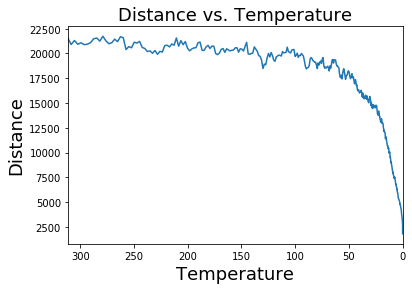

Best TSP tour:  [0, 180, 292, 324, 349, 187, 140, 378, 139, 253, 411, 11, 118, 62, 217, 313, 235, 51, 372, 33, 290, 151, 31, 87, 399, 311, 68, 379, 406, 318, 368, 212, 307, 22, 208, 203, 172, 340, 218, 34, 386, 71, 356, 20, 389, 54, 3, 258, 316, 181, 272, 336, 46, 148, 400, 329, 377, 367, 188, 178, 303, 104, 123, 271, 199, 408, 129, 343, 361, 237, 394, 17, 144, 39, 352, 194, 190, 58, 246, 309, 69, 245, 83, 314, 301, 260, 385, 302, 44, 127, 164, 59, 9, 403, 325, 165, 153, 107, 256, 124, 204, 155, 396, 288, 121, 280, 228, 306, 50, 57, 333, 277, 401, 321, 405, 380, 95, 330, 10, 393, 143, 47, 310, 342, 226, 84, 74, 227, 166, 72, 35, 120, 265, 113, 179, 322, 27, 43, 48, 332, 5, 229, 238, 219, 128, 370, 387, 300, 80, 213, 12, 152, 193, 99, 175, 334, 109, 221, 110, 160, 346, 53, 285, 392, 308, 81, 390, 40, 404, 79, 371, 220, 413, 4, 23, 36, 65, 410, 210, 163, 29, 281, 275, 283, 359, 149, 137, 295, 383, 412, 77, 291, 66, 173, 414, 223, 242, 158, 391, 319, 211, 282, 298, 305, 67, 85, 348, 384, 

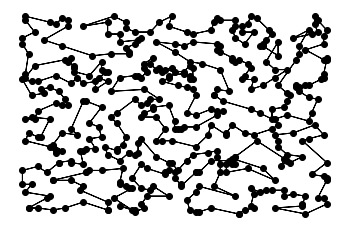

In [80]:
from satsp import solver

cities = [[i,points[i][0], points[i][1]] for i in range(len(points))]

solver.Solve(cities)
solver.PrintSolution()


In [51]:
solver.GetBestDist()

1402.326722764347

## IP Only

In [7]:
m2 = Model()

# Create variables
vars = m2.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')
for i,j in vars.keys():
    vars[j,i] = vars[i,j] # edge in opposite direction
    
# Add degree-2 constraint
m2.addConstrs(vars.sum(i,'*') == 1 for i in range(n))

m2.addConstrs(vars.sum('*',i) == 1 for i in range(n))

# Optimize model
m2._vars = vars
m2.Params.lazyConstraints = 1
m2.optimize(subtourelim)

vals = m2.getAttr('x', vars)
selected = tuplelist((i,j) for i,j in vals.keys() if vals[i,j] > 0.5)

tour = subtour(selected)
assert len(tour) == n

print('')
print('Optimal tour: %s' % str(tour))
print('Optimal cost: %g' % m2.objVal)
print('')

Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 100 rows, 1225 columns and 4900 nonzeros
Variable types: 0 continuous, 1225 integer (1225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 50 rows and 0 columns
Presolve time: 0.01s
Presolved: 50 rows, 1225 columns, 2450 nonzeros
Variable types: 0 continuous, 1225 integer (1225 binary)
Found heuristic solution: objective 345.5563068

Root relaxation: objective 3.381541e+02, 61 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  338.15407    0    6  345.55631  338.15407  2.14%     -    0s
H    0     0                     341.3368929  338.15407  0.93%     -    0s
     0     0     cutoff    0       341.33689  34

AssertionError: 

## IP + Simulated Annealing Starting Solution

In [81]:
m = Model()

# Create variables

vars = m.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')
for i,j in vars.keys():
    vars[j,i] = vars[i,j] # edge in opposite direction

# Add degree-2 constraint
m.addConstrs(vars.sum(i,'*') == 2 for i in range(n))

# Find Solution with Simulated Annealing
#solver.Solve(cities, screen_output=False)

sa_sol = solver.GetBestTour()
## Provide initial solution
for i in range(len(cities)-1):
    vars[sa_sol[i],sa_sol[i+1]].start = 1.0

vars[sa_sol[len(cities)-1],sa_sol[0]].start = 1.0  

# Optimize model
m._vars = vars
m.Params.lazyConstraints = 1
m.optimize(subtourelim)

vals = m.getAttr('x', vars)
selected = tuplelist((i,j) for i,j in vals.keys() if vals[i,j] > 0.5)

tour = subtour(selected)
assert len(tour) == n

print('')
print('Optimal tour: %s' % str(tour))
print('Optimal cost: %g' % m.objVal)
print('')

Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 415 rows, 85905 columns and 171810 nonzeros
Variable types: 0 continuous, 85905 integer (85905 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]

MIP start produced solution with objective 1803.94 (0.27s)
Loaded MIP start with objective 1803.94

Presolve time: 0.15s
Presolved: 415 rows, 85905 columns, 171810 nonzeros
Variable types: 0 continuous, 85905 integer (85905 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+00      1s

Sifting complete


Root relaxation: objective 1.435428e+03, 594 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

  MIR: 3
  Flow cover: 17
  Inf proof: 2
  Zero half: 39
  Lazy constraints: 10

Explored 41641 nodes (266542 simplex iterations) in 420.90 seconds
Thread count was 8 (of 8 available processors)

Solution count 10: 1528.83 1528.83 1529.51 ... 1588.59

Optimal solution found (tolerance 1.00e-04)
Best objective 1.528830219999e+03, best bound 1.528830219999e+03, gap 0.0000%

Optimal tour: [0, 180, 292, 324, 187, 349, 151, 208, 33, 372, 51, 235, 313, 217, 62, 118, 290, 11, 411, 253, 140, 139, 378, 82, 21, 337, 331, 76, 55, 183, 184, 145, 8, 18, 154, 254, 56, 133, 234, 250, 192, 338, 247, 112, 327, 101, 286, 111, 161, 317, 274, 263, 182, 186, 45, 146, 233, 239, 249, 75, 407, 119, 351, 209, 49, 195, 7, 382, 90, 73, 52, 150, 298, 125, 282, 211, 319, 391, 305, 105, 384, 348, 85, 67, 346, 160, 110, 221, 109, 334, 53, 413, 220, 390, 81, 308, 392, 285, 175, 152, 193, 99, 135, 38, 366, 294, 362, 278, 304, 363, 261, 170, 60, 157, 267, 132, 147, 214, 100, 202, 299, 388, 376, 200, 16, 360, 216, 93, 1